In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brsahan/extensive-used-car-price-for-predictive-modeling")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/extensive-used-car-price-for-predictive-modeling


📊 Dataset loaded: 301 rows × 9 columns

📋 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

🔍 Missing Values:
Series([], dtype: int64)

🔍 Duplicate Rows:
2

📈 Skewness Check:
Owner            7.616850
Kms_Driven       6.436013
Present_Price    4.083150
Selling_Price    2.493422
Year            -1.246189
dtype: float64

📌 Recommendation:
⚠️ Owner is highly skewed (skew=7.62). Sug

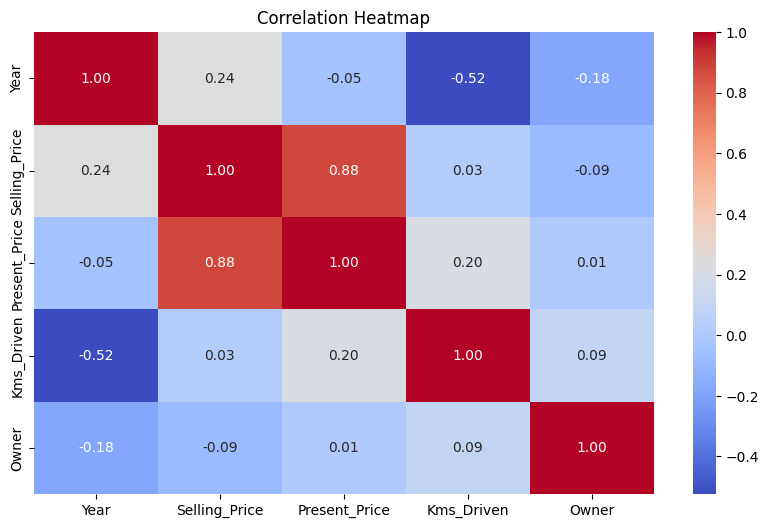

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== 1. Load Data ======
df = pd.read_csv("/kaggle/input/extensive-used-car-price-for-predictive-modeling/car_dataset.csv")  # Ganti dengan nama file kamu
print(f"📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

# ====== 2. Basic Info ======
print("\n📋 Basic Info:")
print(df.info())

# ====== 3. Missing Values & Duplicate Rows Check ======
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n🔍 Duplicate Rows:")
duplicate = df.duplicated().sum()
print(duplicate)

# ====== 4. Skewness Check ======
print("\n📈 Skewness Check:")
skewed_features = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewed_features)

print("\n📌 Recommendation:")
for col, skew in skewed_features.items():
    if abs(skew) > 1:
        print(f"⚠️ {col} is highly skewed (skew={skew:.2f}). Suggest: Apply log or sqrt transform.")
    elif abs(skew) > 0.5:
        print(f"ℹ️ {col} is moderately skewed (skew={skew:.2f}). Transform optional.")
    else:
        print(f"✅ {col} is fairly symmetric (skew={skew:.2f}). No action needed.")

# ====== 5. Outlier Detection (IQR Method) ======
print("\n📦 Outlier Check (IQR Method):")
for col in df.select_dtypes(include=['number']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        print(f"⚠️ {col}: {outlier_count} outliers detected.")
    else:
        print(f"✅ {col}: No significant outliers.")

# ====== 6. Correlation Analysis ======
print("\n🔗 Correlation Matrix (Top correlated pairs):")
correlation = df.corr(numeric_only=True)
cor_matrix = correlation.abs().unstack().sort_values(ascending=False).drop_duplicates()
top_corr = cor_matrix[(cor_matrix < 1) & (cor_matrix > 0.7)]
print(top_corr)

print("\n📌 Recommendation:")
for (f1, f2), corr_val in top_corr.items():
    print(f"⚠️ {f1} & {f2} have high correlation ({corr_val:.2f}). Suggest: Keep only one or apply dimensionality reduction (e.g., PCA).")

# ====== 7. Heatmap ======
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
import pandas as pd

# Menentukan Q1 (25%) dan Q3 (75%) untuk setiap kolom
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghapus data yang berada di luar batas
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

# Contoh penerapan untuk kolom Year, Selling_Price, dll
df_filtered = remove_outliers(df, 'Year')
df_filtered = remove_outliers(df_filtered, 'Selling_Price')
df_filtered = remove_outliers(df_filtered, 'Present_Price')
df_filtered = remove_outliers(df_filtered, 'Kms_Driven')
df_filtered = remove_outliers(df_filtered, 'Owner')

# Lihat hasilnya
print(f"Data setelah outlier dihapus: {df_filtered.shape[0]} baris")


Data setelah outlier dihapus: 261 baris


In [5]:
# remove duplikat
df = df.drop_duplicates()

In [6]:
# Drop kolom yang tidak dipakai
df = df.drop(columns=['Car_Name'])

In [7]:
# Konversi year untuk mengetahui umur mobil
df['Car_Age'] = 2025 - df['Year']
df = df.drop(columns=['Year'])

In [8]:
# Transform log yang high skew
import numpy as np
df['Kms_Driven'] = np.log1p(df['Kms_Driven'])
df['Present_Price'] = np.log1p(df['Present_Price'])
df['Selling_Price'] = np.log1p(df['Selling_Price'])
df['Owner'] = np.log1p(df['Owner'])
df['Car_Age'] = np.log1p(df['Car_Age'])

In [9]:
# Encode fitur kategorikal
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Split data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Training dan Prediksi
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8411152766872971
RMSE: 0.3221317021279455
MAE: 0.16985571423782134
MSE: 0.1037688335158474


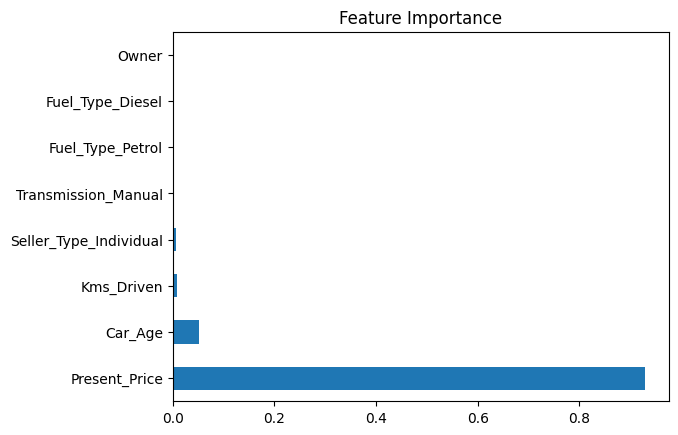

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [13]:
# Evaluasi di skala asli
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Invers log transform (mengembalikan ke skala asli)
y_test_orig = np.expm1(y_test)     # np.expm1(x) = exp(x) - 1
y_pred_orig = np.expm1(y_pred)

# Evaluasi di skala asli
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred_orig)

# Cetak hasil
print("🔍 Evaluasi di Skala Asli:")
print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


🔍 Evaluasi di Skala Asli:
R2 Score: 0.6237513211279002
MAE: 1.3629487010882344
MSE: 9.697155861335313
RMSE: 3.1140256680598046


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


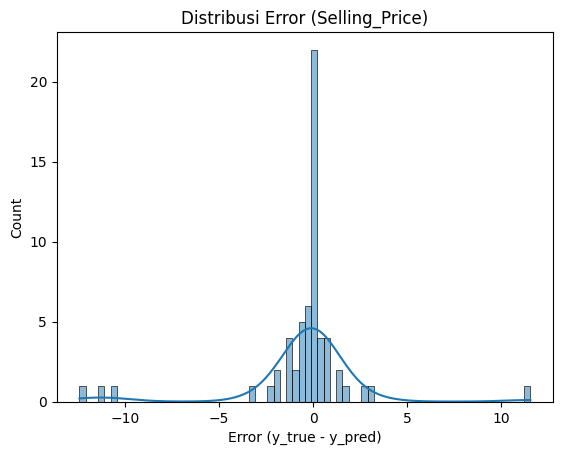

In [14]:
# Cek Error Per Data Point
import seaborn as sns
import matplotlib.pyplot as plt

errors = y_test_orig - y_pred_orig
sns.histplot(errors, kde=True)
plt.title("Distribusi Error (Selling_Price)")
plt.xlabel("Error (y_true - y_pred)")
plt.show()

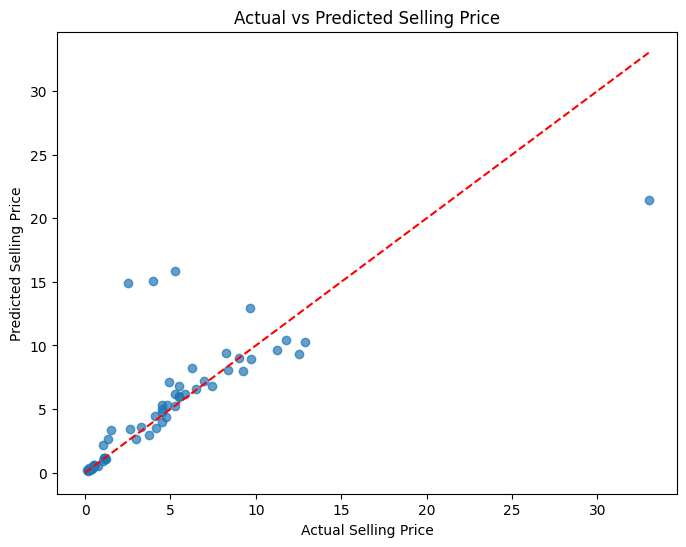

In [15]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.7)
plt.plot([0, max(y_test_orig)], [0, max(y_test_orig)], color='red', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()


In [16]:
# Cek Outlier Paling Jauh
df_result = pd.DataFrame({
    'Actual': y_test_orig,
    'Predicted': y_pred_orig,
    'Error': y_test_orig - y_pred_orig
})
print(df_result.sort_values(by='Error', key=abs, ascending=False).head(5))

    Actual  Predicted      Error
85    2.50  14.918342 -12.418342
64   33.00  21.458190  11.541810
94    4.00  15.098841 -11.098841
78    5.25  15.878333 -10.628333
99    9.65  12.925883  -3.275883
